 <img src="data/opi.jpg">

# OPI C

# C1 BOPS Resuelve el siguiente caso:

## Dependencias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import sample 
colors = ["#242c54", "#eb3844", "#645674", "#0c0c3c", "#cdcdd7","#d13244"]
customPalette = sns.set_palette(sns.color_palette(colors))

## Datos

In [2]:
data_bm=pd.read_csv('data/BOPs_case/bops_bm.csv')#,encoding='utf-8')
data_online=pd.read_csv('data/BOPs_case/bops_online.csv')#,encoding='latin1')
data_bm.columns=[x.replace(" ","").replace("id(store)","id_store") for x in data_bm.columns.tolist()]
data_online.columns=[x.replace(" ","").replace("id(store)","id_store") for x in data_online.columns.tolist()]
data_bm.sales=[float(i.replace(",","")) for i in data_bm.sales.tolist()]
data_online.sales=[float(i.replace(",","")) for i in data_online.sales.tolist()]

### AnálisisOnline

Para poder determinar si BOPS genera una propuesta de valor que ayude a incrementar las ventas, tanto Online como en B&M, 
hice un análisis segmentado, primero analizaré las ventas ONLINE

### Análisis de los datos de ventas Online

Si agrupamos las ventas mensuales te todas DMA, tanto cercanas como lejanas y hacemos un promedio menusal de ventas podemos observar que a partir del mes 
en que se implemento BOPS las ventas promedio tienen una tendencia a la baja.

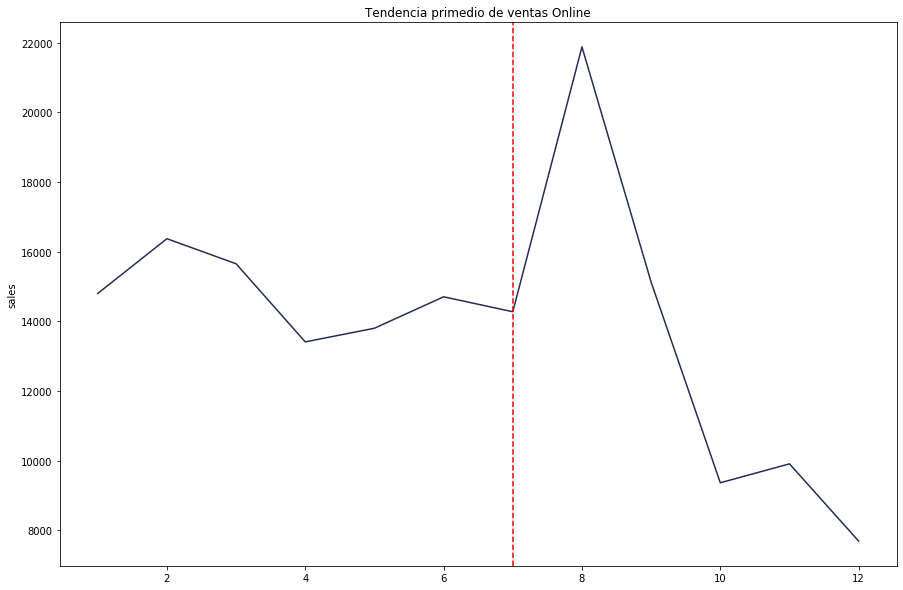

In [3]:
online_promedio=pd.DataFrame(data_online.groupby(["year","month"])['sales'].mean()).reset_index(level=['year', 'month',])
index=[i for i in range(1,13)]
plt.figure(figsize=(15,10))
bm_i=online_promedio
sns.lineplot(data=bm_i, x=index, y="sales"
                ).set_title('Tendencia primedio de ventas Online')
plt.axvline(7,color ='red',linestyle ="--")

Para poder hacer un analisis mas profundo y no perder informacion del tipo de DMA, cercano y lejano. Se implemente el mismo analisis solo separando el tipo de DMA

### Conprativa de la tendencia promedio de ventas online de DMA cercanas y lejanas

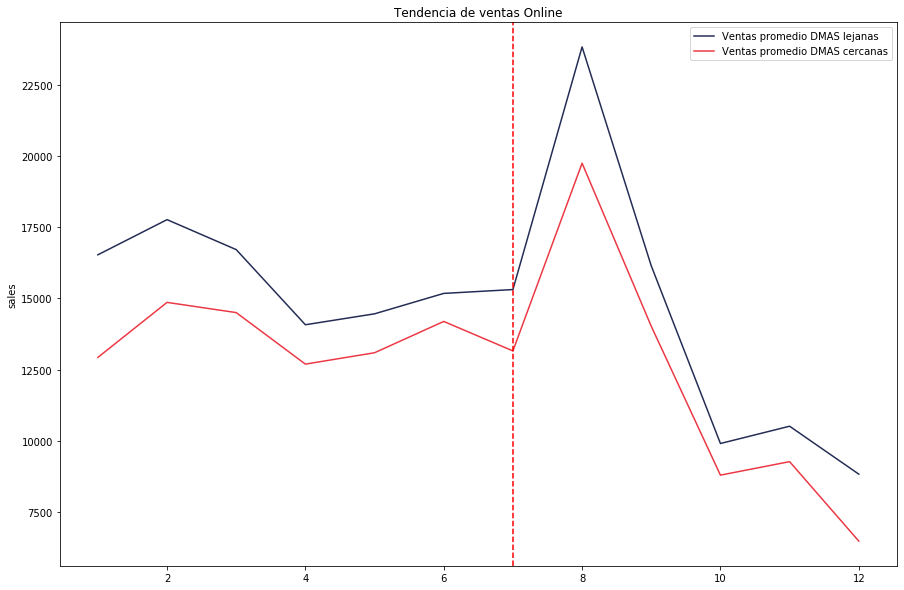

In [4]:
online_promedio_cercano=pd.DataFrame(data_online.loc[data_online.close==1].groupby(["year","month"])['sales'].mean()).reset_index(level=['year', 'month',])
online_promedio_lejos=pd.DataFrame(data_online.loc[data_online.close==0].groupby(["year","month"])['sales'].mean()).reset_index(level=['year', 'month',])
bm_l=online_promedio_lejos
bm_c=online_promedio_cercano
index=[i for i in range(1,13)]
plt.figure(figsize=(15,10))
sns.lineplot(data=bm_l, x=index, y="sales" ,label='Ventas promedio DMAS lejanas')
sns.lineplot(data=bm_c, x=index, y="sales", label='Ventas promedio DMAS cercanas').set_title('Tendencia de ventas Online')
plt.axvline(7,color ='red',linestyle ="--")

Esta grafia nos describe que efectivamente no importa si la DMA esta cerca o lejos, las ventas en promedio van a la baja. 
Una mala noticia para nuestra iniciativa de implementar BOPS en Canada.

### Análisis de B&M

#### Por otro lado si hacemos el analisis para B&M en USA

Calculando el promedio de ventas mensuales de todas las tiendas, podemos observar que de igual manera las ventas bajan a partir del mes que se implemento el BOPS

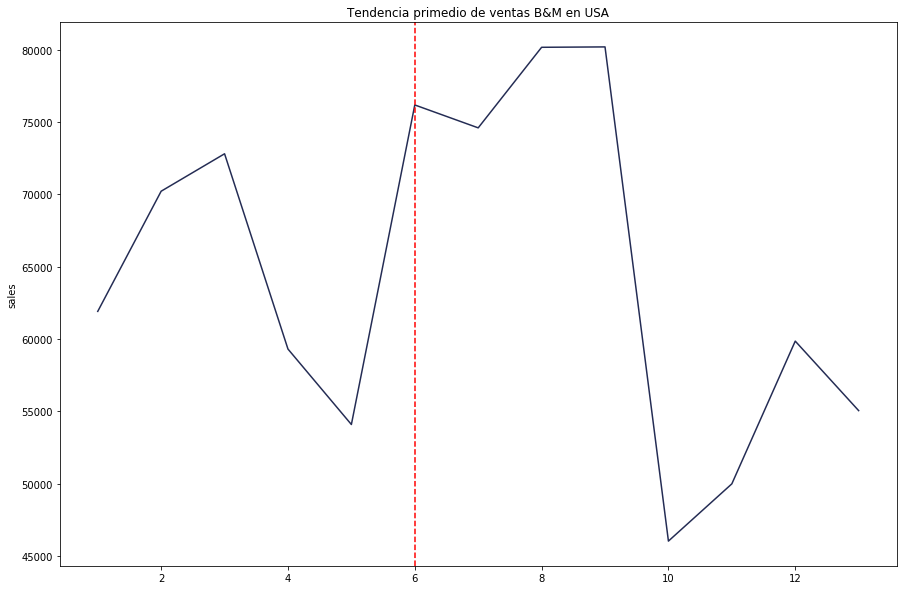

In [5]:
bm_promedio=pd.DataFrame(data_bm.loc[data_bm.usa==1].groupby(["year","month"])['sales'].mean()).reset_index(level=['year', 'month',])
index=[i for i in range(1,14)]
plt.figure(figsize=(15,10))
bm_i=bm_promedio
ax= sns.lineplot(data=bm_i, x=index, y="sales"
                ).set_title('Tendencia primedio de ventas B&M en USA')
plt.axvline(6,color ='red',linestyle ="--")

Haciendo un análisis por tienda, tomando de forma aleatoria sólo 10 podemos observar que, de igual manera que las operaciones
online, a partir del momento en que se implementa BOPS las ventas van a la baja

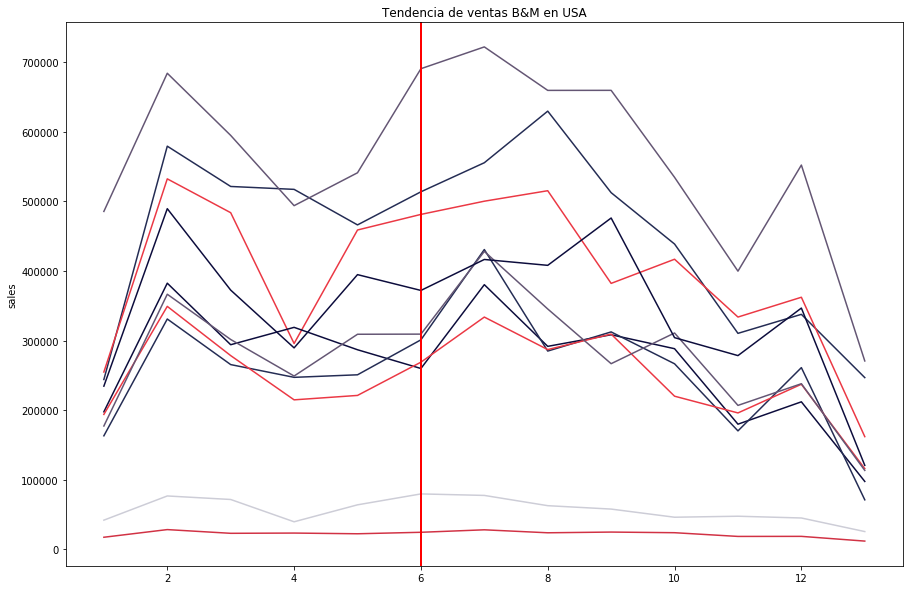

In [6]:
tiendas_list=data_bm.loc[data_bm.usa==1].id_store.unique().tolist()
bm=pd.DataFrame(data_bm.loc[data_bm.usa==1].groupby(["id_store","year","month"])['sales'].sum()).reset_index(level=['id_store','year', 'month',])
index=[i for i in range(1,14)]
plt.figure(figsize=(15,10))
for i in sample(tiendas_list,k=10):
    bm_i=bm.loc[bm.id_store==i]
    sns.lineplot(data=bm_i, x=index, y="sales"#, palette=customPalette
                ).set_title('Tendencia de ventas B&M en USA')
    plt.axvline(6,color ='red')

Esto concluye que de alguna forma la estrategia BOPS no esta ayudando a obtener mejor desempeño en ventas.

### 1. ¿Deberían expandirse a Canadá?

No es conveniente expandirse a Canadá, pues la estrategia BOPS no dio una propuesta de valor para obtener más ventas en USA, por lo tanto es probable el panorama en Canadá sea similar, pensando que dinamica con la cual las personas compran en USA es similar a Canadá.

### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología.

Para resolver esta pregunta dividiremos el panorama en el antes y despues del 10/11/2011 

In [7]:
bm=data_bm.groupby(["year","month"])['sales'].mean().reset_index(level=['year', 'month',])
online=data_online.groupby(["year","month"])['sales'].mean().reset_index(level=['year', 'month',])
online=online.append({'year' : 2012 , 'month' : 4, 'sales': 0} , ignore_index=True)
ventas=pd.DataFrame({'year':[],'month':[],'sales_online':[],'sales_bm':[],'sales_total':[]})
ventas['year']=online['year']
ventas['month']=online['month']
ventas['sales_online']=online['sales']
ventas['sales_bm']=bm['sales']
ventas['sales_total']= online['sales']+bm['sales']

In [8]:
promedio_antes=ventas.sales_total[0:8].mean()
promedio_antes

83860.92007440477

Las ventas promedio mensuales hasta el mes 7 eran de: 83860.92007440477 USD 

Si multiplicamos por los 5 meses después de la implementacion se puede inferir que a partir del mes 7 hasta el mes 12 se pudieron haber obtenido 419304.6003720239

In [11]:
promedio_antes*5

419304.6003720239

Sin embargo solo se obtuvieron sólo 

In [12]:
ventas.sales_total[8:].sum()

328628.7115079365

lo que indica una perdida de 90675.8888640874 USD

In [16]:
promedio_antes*5-ventas.sales_total[8:].sum()

90675.8888640874